# Reading the data

In [1]:
# Import pandas
!pip install pip --upgrade --user -q --no-warn-script-location
!pip install numpy pandas --user -q --no-warn-script-location

In [2]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

{'restart': True, 'status': 'ok'}

In [2]:
# Import pandas
import pandas as pd

In [3]:
# load the data
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Ele_production.csv')

In [4]:
# top 5 rows
data.head()

,DATE,Production_units
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [5]:
# shape of data
data.shape

(397, 2)

In [6]:
# set index
data.set_index('DATE',inplace=True)

# Checking the stationarity of series

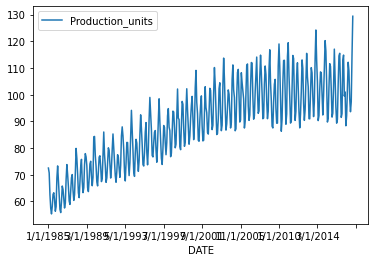

In [7]:
# check how series looks like
data.plot()

In [8]:
# Stastical way of testing the stationarity
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


H0: Non-Stationary (Accepted if p > 0.05)

H1: Stationary (Accepted if p < 0.05)

In [9]:
# checking the stationarity
result = adfuller(data['Production_units'])
print('No differentiation: \n P-Value',result[1])

result = adfuller(data['Production_units'].diff().dropna())
print('1st differentiation: \n P-Value',result[1])

result = adfuller(data['Production_units'].diff().diff().dropna())
print('2nd differentiation: \n P-Value',result[1])

No differentiation: 
 P-Value 0.18621469116587053
1st differentiation: 
 P-Value 4.0777865655394705e-10
2nd differentiation: 
 P-Value 4.1836937479977153e-17


In [10]:
# Using 1st order differentiation
data['Stationary'] = data['Production_units'].diff()

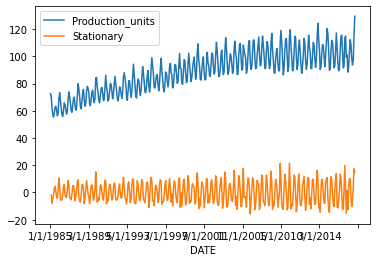

In [11]:
# take look at original series and stationary series
data.plot()

# Finding the values for parameters

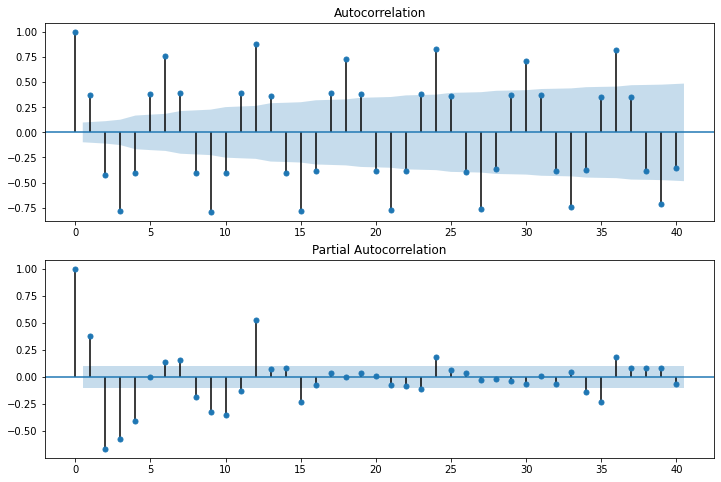

In [12]:
# import acf and pacf plots to find p and q
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Stationary'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Stationary'].dropna(),lags=40,ax=ax2)

* Thus we can consider p = 1, d = 1 (differentiation) and q = 10

---




# Building Arima model

In [13]:
# Import arima model
from statsmodels.tsa.arima_model import ARIMA

In [14]:
# Initailize and train
arm = ARIMA(data.Production_units.dropna(), order=(1,1,10))
model = arm.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [15]:
# Summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:     D.Production_units   No. Observations:                  396
Model:                ARIMA(1, 1, 10)   Log Likelihood               -1118.816
Method:                       css-mle   S.D. of innovations              4.042
Date:                Tue, 17 May 2022   AIC                           2263.632
Time:                        09:26:29   BIC                           2315.391
Sample:                    02-01-1985   HQIC                          2284.137
                         - 01-01-2018                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1070      0.028      3.875      0.000       0.053       0.161
ar.L1.D.Production_units      0.0952      0.118      0.806      0.421      -0.136       0.327
ma.L1.D.Production_units     -0.1589      0.111     -1.429      0.154      -0.377       0.059
ma.L2.D.Production_units     -0.8053      0.061    -13.162      0.000      -0.925      -0.685
ma.L3.D.Production_units     -0.3892      0.096     -4.056      0.000      -0.577      -0.201
ma.L4.D.Production_units      0.2727      0.056      4.902      0.000       0.164       0.382
ma.L5.D.Production_units      0.5644      0.059      9.544      0.000       0.449       0.680
ma.L6.D.Production_units      0.0358      0.067      0.533      0.594      -0.096       0.167
ma.L7.D.Production_units     -0.5981      0.057    -10.498      0.000      -0.710      -0.486
ma.L8.D.Production_units     -0.5158      0.096     -5.387      0.000      -0.703      -0.328
ma.L9.D.Production_units      0.1783      0.045      3.987      0.000       0.091       0.266
ma.L10.D.Production_units     0.5386      0.052     10.290      0.000       0.436       0.641
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            10.5088           +0.0000j           10.5088            0.0000
MA.1             1.0276           -0.1033j            1.0328           -0.0159
MA.2             1.0276           +0.1033j            1.0328            0.0159
MA.3             0.7670           -0.6730j            1.0204           -0.1146
MA.4             0.7670           +0.6730j            1.0204            0.1146
MA.5            -0.1596           -1.0474j            1.0595           -0.2741
MA.6            -0.1596           +1.0474j            1.0595            0.2741
MA.7            -0.7403           -0.8284j            1.1110           -0.3661
MA.8            -0.7403           +0.8284j            1.1110            0.3661
MA.9            -1.0602           -0.2873j            1.0984           -0.4579
MA.10           -1.0602           +0.2873j            1.0984            0.4579
------------------------------------------------------------------------------
"""

# Forecasting with fitted ARIMA

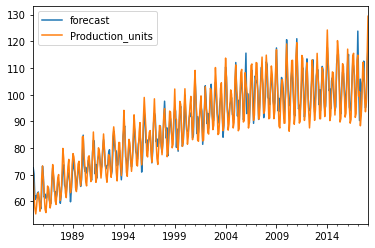

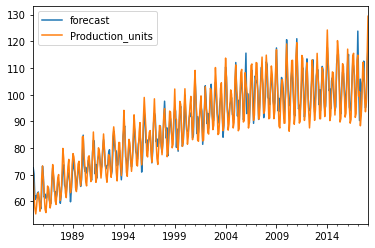

In [16]:
# Actual vs Fitted values 
model.plot_predict(dynamic=False)

In [17]:
# forecasting next 10 values
model.forecast(10)[0]

array([112.22163916,  97.59923217,  96.15572225, 105.98270755,
       111.72749527, 109.12647751,  99.70771458,  93.75770635,
        97.05431546,  97.46484864])

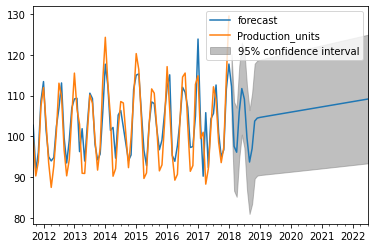

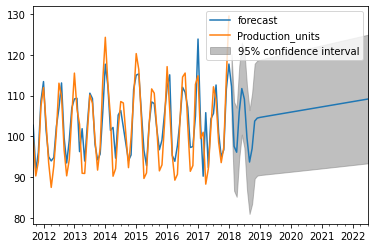

In [18]:
# comparing the fitted interval and forecasting results
model.plot_predict(start = 320,end = 450, dynamic=False)